In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("white")
sns.set_palette('Set2')

# Data Load

In [3]:
df = pd.read_csv("../credit_card_fraud_anomaly_detection/creditcard.csv")
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [6]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

# EDA

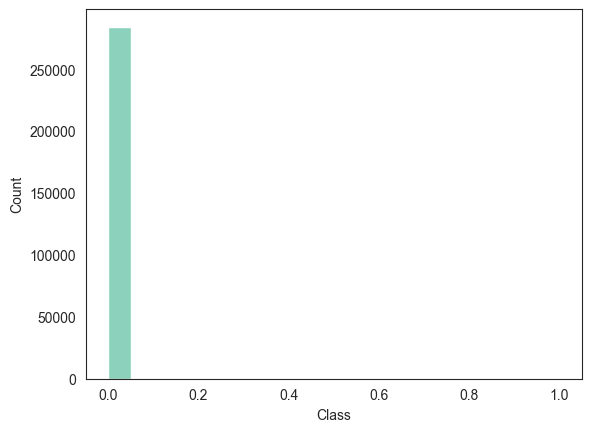

In [9]:
sns.histplot(df['Class']);

In [10]:
df['Class'].value_counts()

Class
0    284315
1       492
Name: count, dtype: int64

> როგორც ვხედავთ მაინორითი კლასი ძალიან მცირედ არის წარმოდგენილი

In [12]:
df['Time'].min(), df['Time'].max()

(0.0, 172792.0)

> ცალსახად ორი დღის მონაცემი გვაქვს, რადგან ორ დღეში 172,800 წამია

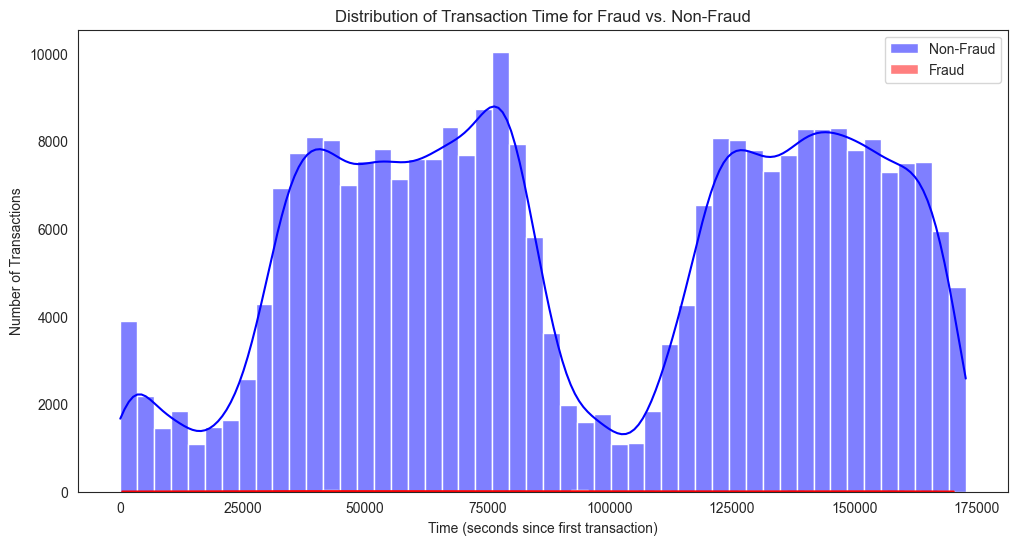

In [14]:
fraud = df[df['Class'] == 1]
non_fraud = df[df['Class'] == 0]

plt.figure(figsize=(12, 6))
sns.histplot(non_fraud['Time'], bins=50, color='blue', label='Non-Fraud', kde=True)
sns.histplot(fraud['Time'], bins=50, color='red', label='Fraud', kde=True)
plt.title('Distribution of Transaction Time for Fraud vs. Non-Fraud')
plt.xlabel('Time (seconds since first transaction)')
plt.ylabel('Number of Transactions')
plt.legend()
plt.show()

> გრაფიკზე ნათლად ჩანს ორი დღის პატერნი, თუმცა ფროდის სიმცირიდან გამომდინარე გვჭირდება სხვა გრაფიკი დროსთან მიმართების დასაჭერად.

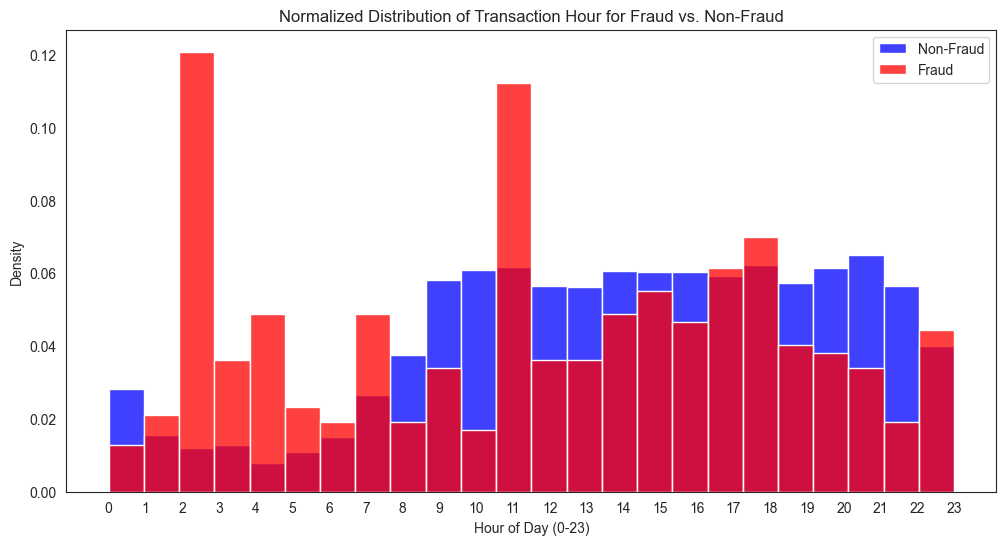

In [16]:
df['HourOfDay'] = (df['Time'] / 3600) % 24
df['HourOfDay'] = df['HourOfDay'].astype(int)

fraud_df = df[df['Class'] == 1]
non_fraud_df = df[df['Class'] == 0]

plt.figure(figsize=(12, 6))
sns.histplot(non_fraud_df['HourOfDay'], bins=24, color='blue', label='Non-Fraud', kde=False, stat="density")
sns.histplot(fraud_df['HourOfDay'], bins=24, color='red', label='Fraud', kde=False, stat="density")
plt.title('Normalized Distribution of Transaction Hour for Fraud vs. Non-Fraud')
plt.xlabel('Hour of Day (0-23)')
plt.ylabel('Density')
plt.xticks(range(24))
plt.legend()
plt.show()

> არაფროდ ტრანზაქციები აჩვენებს ტიპიურ დღიურ პატერნს, რომელიც იწყება დილის 9 საათიდან და დაახლოებით თანაბრად გრძელდება საღამოს 10 საათამდე.
>
> ფროდის შემთხვევაში კი ვხვდებით ორ პიკს. ღამის 2 საათიდან 3 საათამდე და დილის 11 საათზე. შესაძლოა არსებობდეს ორი მიდგომა: ფროდი ხდება მაშინ, როცა ყველაზე დაბალი აქტივობაა და ასევე არის მცდელობა, რომ ფროდ ტრანზაქციები შეაპარონ ჩვეულებრივ დროს, მაშინ როდესაც ისედაც მაღალი აქტიურობაა.
>
> ყველა ვარიანტში, დღის მონაკვეთი გამოსადეგი ცვლადია

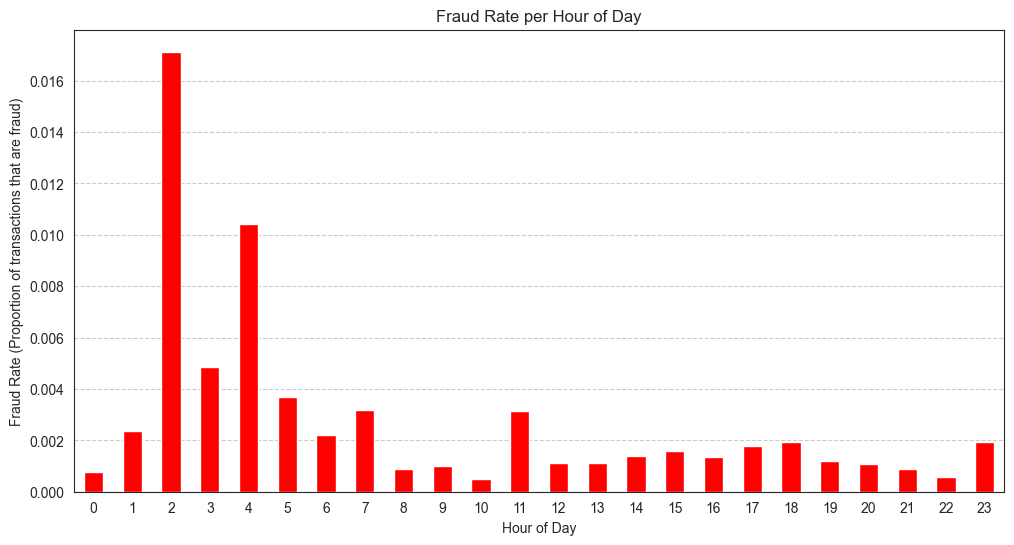

In [18]:
hourly_fraud_rate = df.groupby('HourOfDay')['Class'].mean() # .mean() gives the proportion of 1s (fraud)

plt.figure(figsize=(12,6))
hourly_fraud_rate.plot(kind='bar', color='red')
plt.title('Fraud Rate per Hour of Day')
plt.xlabel('Hour of Day')
plt.ylabel('Fraud Rate (Proportion of transactions that are fraud)')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--')
plt.show()

> ეს გრაფიკიც ადასტურებს, რომ ღამის 2 საათის მიდაომოებში ფროდის რეითი განსაკუთრებით მაღალია, ზოგადად ფროდის წილთან შედარებით. მთლიან დეითასეთში ფროდის წილი 0.17%, ღამის 2 საათზე კი 1.7%, რაც იმას ნიშნავს, რომ ამ დროს 10-ჯერ მეტი ფროდი ხდება, ვიდრე ზოგადად

> დროს როგორც ცვლადს გამოვიყენებთ, თუმცა დროის ციკლურობიდან გამომდინარე უმჯობესი იქნება თუ მას კოსინუსურ და სინუსურ მნიშვნელობებს მივანიჭებთ.

In [21]:
df['Hour_Sin'] = np.sin(2 * np.pi * df['HourOfDay'] / 24)
df['Hour_Cos'] = np.cos(2 * np.pi * df['HourOfDay'] / 24)

# You would then drop 'HourOfDay' and use 'Hour_Sin' and 'Hour_Cos' instead.
# df.drop('HourOfDay', axis=1, inplace=True)

> შევხედოთ, გასხვავდება თუ არა ტრანზაქციის ოდენობა კლასის მიხედვით

In [23]:
print("Overall Amount Statistics:")
print(df['Amount'].describe())
print("\n")

print("Amount Statistics for Non-Fraudulent Transactions (Class 0):")
print(df[df['Class'] == 0]['Amount'].describe())
print("\n")

print("Amount Statistics for Fraudulent Transactions (Class 1):")
print(df[df['Class'] == 1]['Amount'].describe())

Overall Amount Statistics:
count    284807.000000
mean         88.349619
std         250.120109
min           0.000000
25%           5.600000
50%          22.000000
75%          77.165000
max       25691.160000
Name: Amount, dtype: float64


Amount Statistics for Non-Fraudulent Transactions (Class 0):
count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64


Amount Statistics for Fraudulent Transactions (Class 1):
count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64


> როგორც ვხედავთ გარკვეული სხვაობა არის საშუალოს, მედიანასა და სხვა სტატისტიკურ მნიშვნელობებს შორის. ვნახოთ გრაფიკზეც.

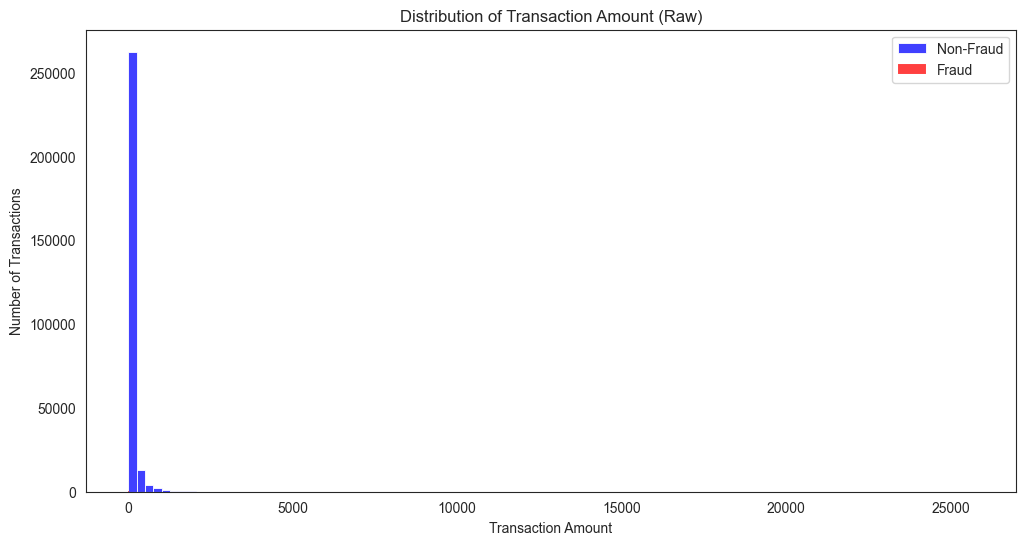

In [25]:
plt.figure(figsize=(12, 6))
sns.histplot(df[df['Class'] == 0]['Amount'], bins=100, color='blue', label='Non-Fraud', kde=False)
sns.histplot(df[df['Class'] == 1]['Amount'], bins=100, color='red', label='Fraud', kde=False)
plt.title('Distribution of Transaction Amount (Raw)')
plt.xlabel('Transaction Amount')
plt.ylabel('Number of Transactions')
plt.legend()
#plt.xlim(0, 2000) # You might need to limit x-axis to see the bulk of the data
plt.show()

> ფროდის ნაკლებობიდან გამომდინარე, ამ გრაფიკზე განსაკუთრებული არაფერი ჩანს, გარდა იმისა, რომ ტრანზაქციის ოდენობა გადახრილია, როგორც ეს ხშირად ხდება მსგავსი ტიპის ცვლადების დროს. იმ მოდელებისთვის, რომლებსაც ნორმალური განაწილება სჭირდებათ, დაგვჭირდება მისი ლოგარითმული ტრანსფორმაცია.

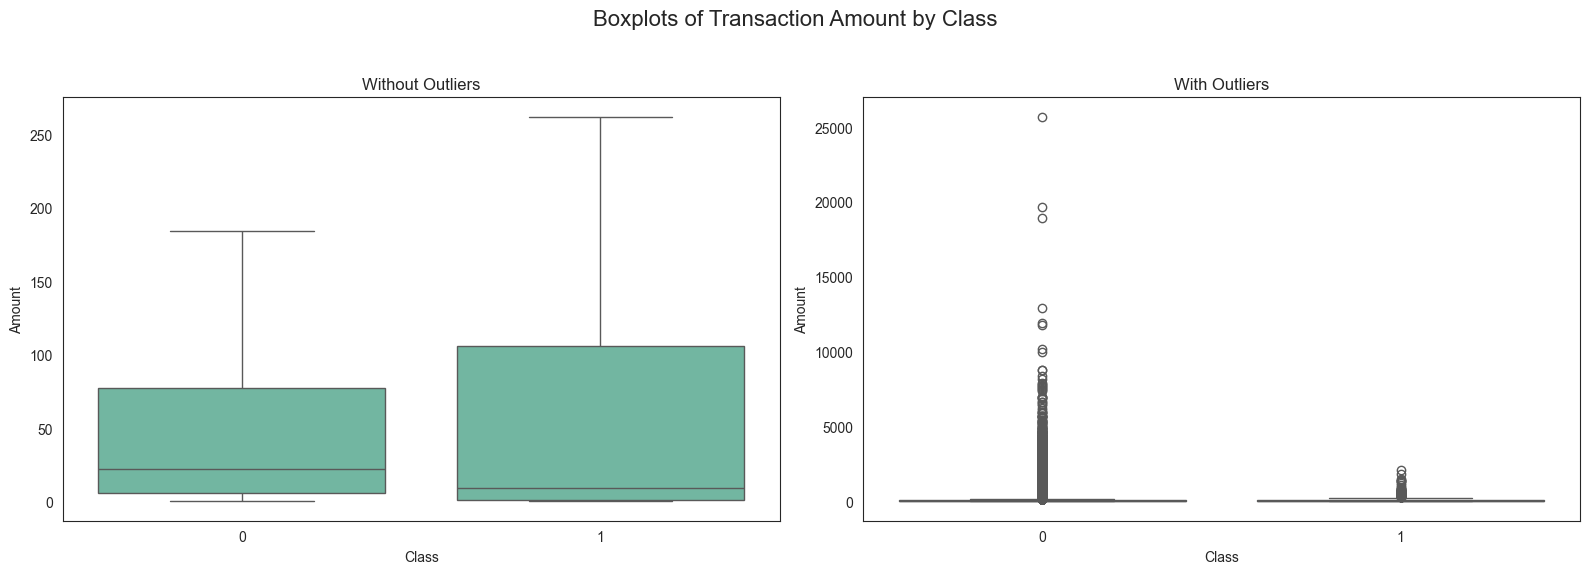

In [27]:
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Boxplot without outliers
sns.boxplot(x='Class', y='Amount', data=df, showfliers=False, ax=axes[0])
axes[0].set_title('Without Outliers')
#axes[0].set_ylim(0, 500)

# Boxplot with outliers
sns.boxplot(x='Class', y='Amount', data=df, ax=axes[1])
axes[1].set_title('With Outliers')

fig.suptitle('Boxplots of Transaction Amount by Class', fontsize=16)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

> თუ აუთლაირების გარეშე შევხედავთ ტრანზაქციების მოცულობას კლასების მიხედვით, დავინახავთ, რომ ფროდის ტრანზაქციების დიდი ნაწილი 260 ევრომდეა. თუმცა, მედიანა უფრო დაბალია ვიდრე არაფროდ ტრანზაქციები, რაც იმას ნიშნავს, რომ ბევრი დაბალი ღირებულების ტრანზაქციაა გაკეთებული ფროდერების მიერ. შესაძლოა გადამოწმების მიზნით.
>
> აუთლიერებთან ერთად კი ჩანს, რომ არაფროდ ტრანზაქციებს უფრო ფართო რეინჯი აქვს და ფროდ ტრანზაქციების მაქსიმუმი დაახლოებით 2500-ია.

> ავიღებთ ოდეობის ლოგარითმს და ეს გამოგვადგება როგორც სხვა გრაფიკების ასაგებად, ასევე მოდელის გასაწვრთნელად.

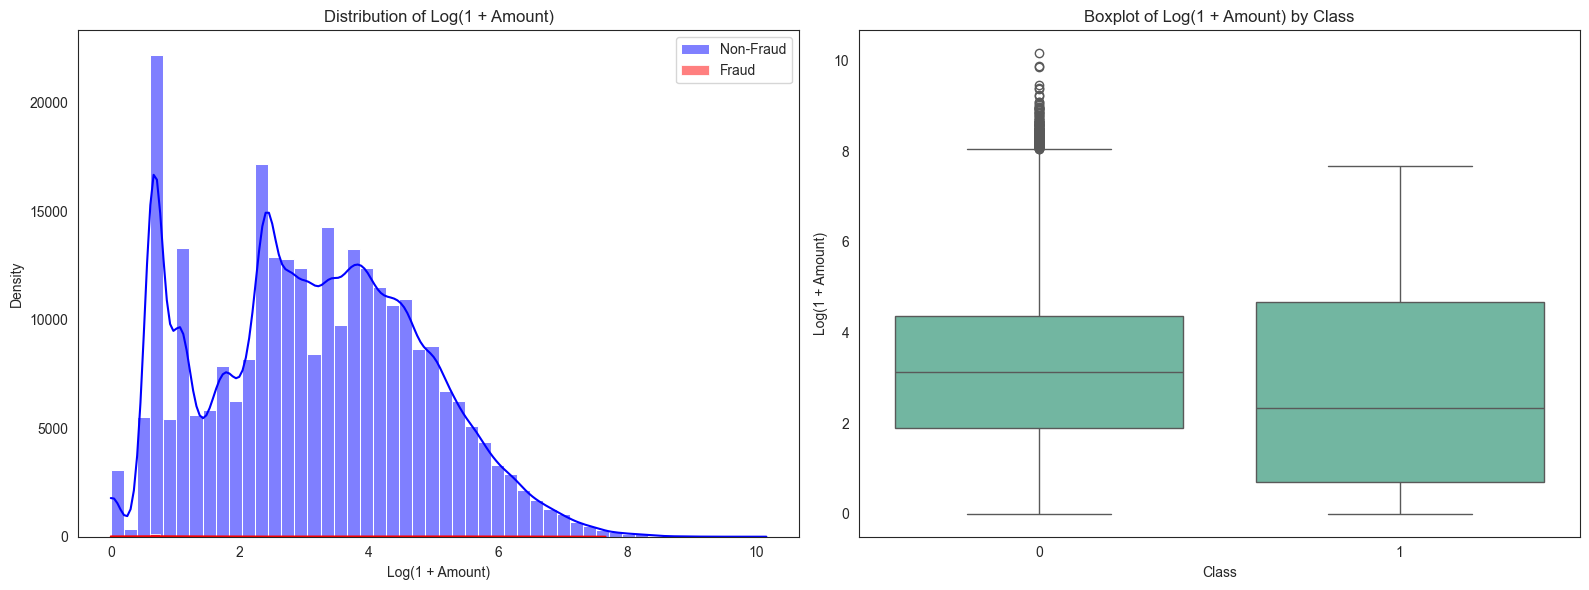

In [30]:
df['LogAmount'] = np.log1p(df['Amount'])

fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Histogram with KDE by class
sns.histplot(df[df['Class'] == 0]['LogAmount'], bins=50, color='blue', label='Non-Fraud', kde=True, ax=axes[0])
sns.histplot(df[df['Class'] == 1]['LogAmount'], bins=50, color='red', label='Fraud', kde=True, ax=axes[0])
axes[0].set_title('Distribution of Log(1 + Amount)')
axes[0].set_xlabel('Log(1 + Amount)')
axes[0].set_ylabel('Density')
axes[0].legend()

# Boxplot
sns.boxplot(x='Class', y='LogAmount', data=df, ax=axes[1])
axes[1].set_title('Boxplot of Log(1 + Amount) by Class')
axes[1].set_xlabel('Class')
axes[1].set_ylabel('Log(1 + Amount)')

plt.tight_layout()
plt.show()

> მონაცემები უფრო ნორმალურად განაწილებული გახდა. მარჯვენა მხარეს კი, აქაც ჩანს, რომ ფროდ ტრანზაქციების ინტერკვარტილური რეინჯი უფრო ფართოა და აუთლაიერები ნაკლებად გვხვდება, გასხვავებით არაფროდ ტრანზაქციებიდან.

> შევხედოთ PCA-ით მიღებული ცვლადების განაწილებებსაც

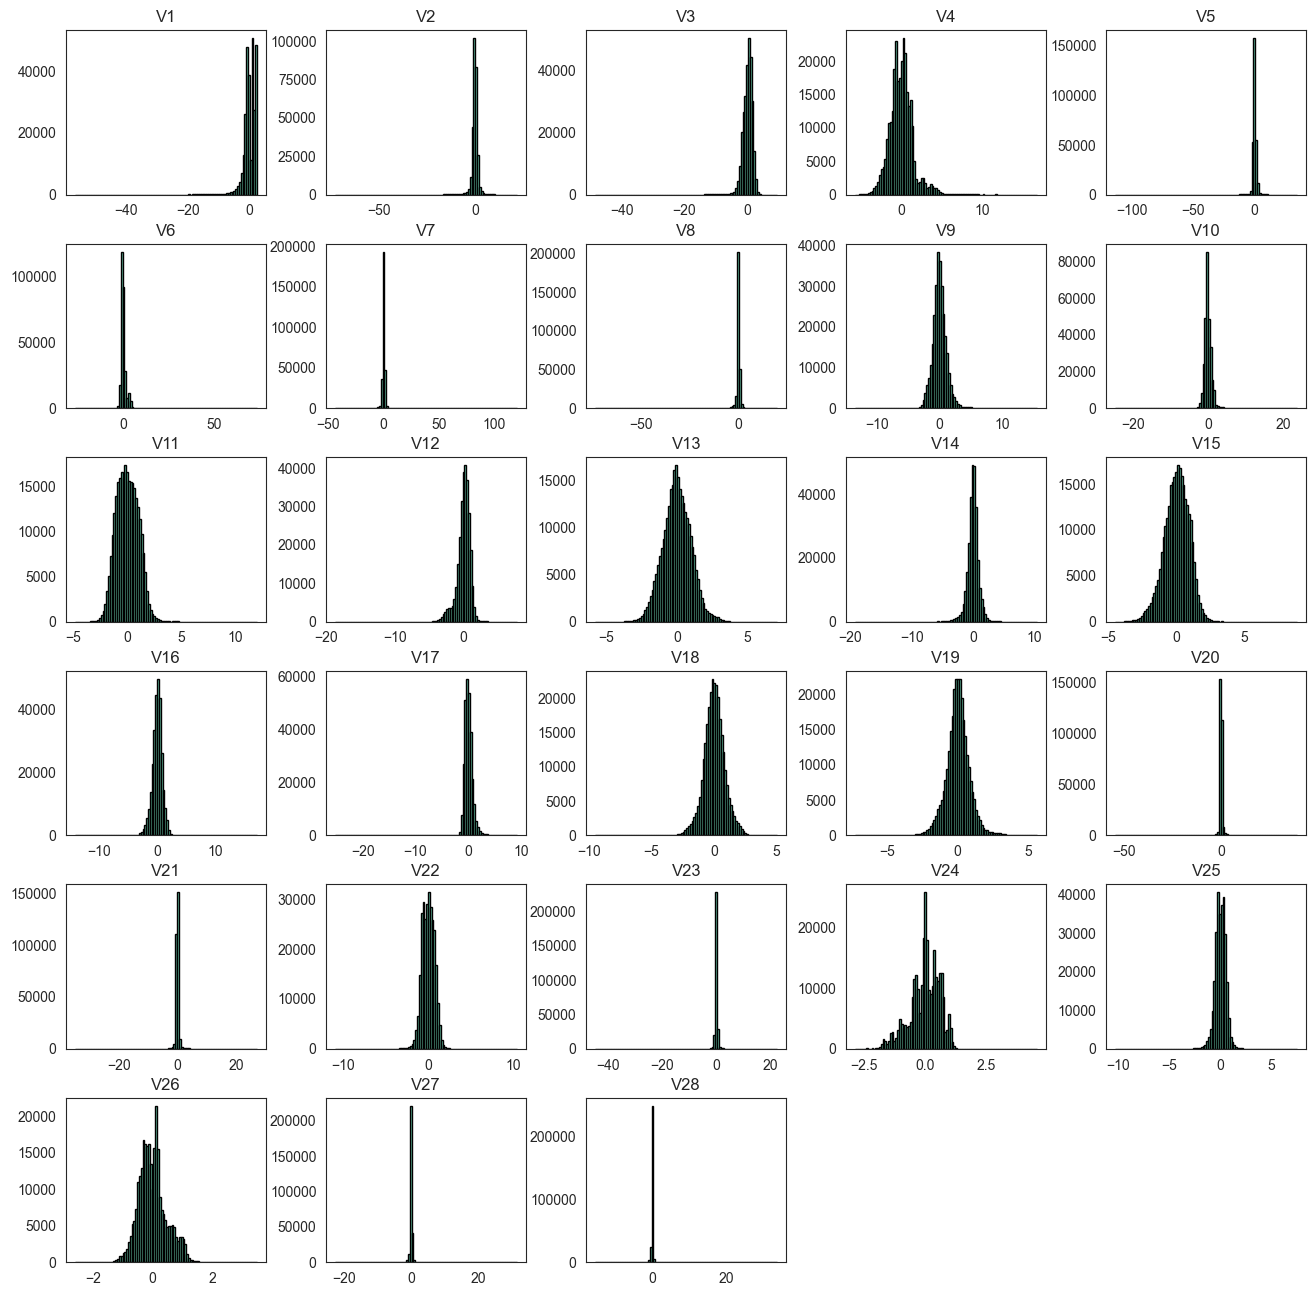

In [33]:
df.loc[:, "V1":"V28"].hist(figsize=(16,16), bins=100, edgecolor="black", grid=False)
#plt.suptitle('Distribution of Features')
plt.show()

> როგორც ვხედავთ, ცვლადების დიდი ნაწილი სიმეტრიულად და ნორმალურად არის განაწილებული 0-ის გარშემო. ამ მხრივ აშკარად გამოირჩევა. V1 ცვლადი, რომელიც როგორც წესი ყველაზე დიდ ვარიაციას ინახავს და აქ მარცხნივ არის გადახრილი.

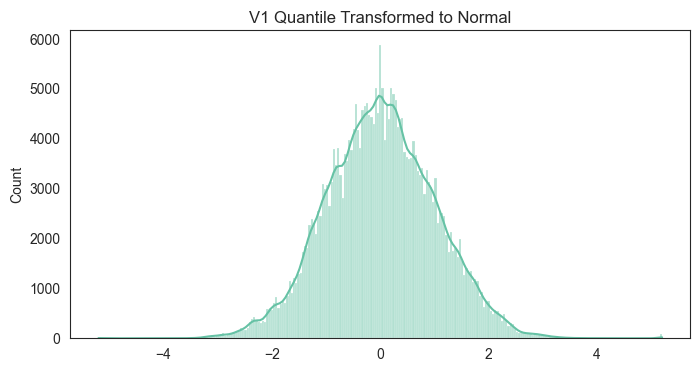

In [35]:
from sklearn.preprocessing import QuantileTransformer

qt_normal = QuantileTransformer(output_distribution='normal', random_state=42)

v1_normal = qt_normal.fit_transform(df[['V1']])
v1_normal = v1_normal.ravel()

plt.figure(figsize=(8, 4))
sns.histplot(v1_normal, kde=True)
plt.title('V1 Quantile Transformed to Normal')
plt.show()

> თუ დაგვჭირდა, შეგვიძლია ეს ცვლადი გავხადოთ ნორმალურად განაწილებული, თუმცა, ეს ტრანსფორმაცია შემდგომ მხოლოდ სატრენინგო დეითაზე უნდა შევასრულოთ.

> ახლა კი შევხედოთ V ცვლადების განაწილებას კლასების მიხედვით.

In [38]:
v_features = [f'V{i}' for i in range(1, 29)]

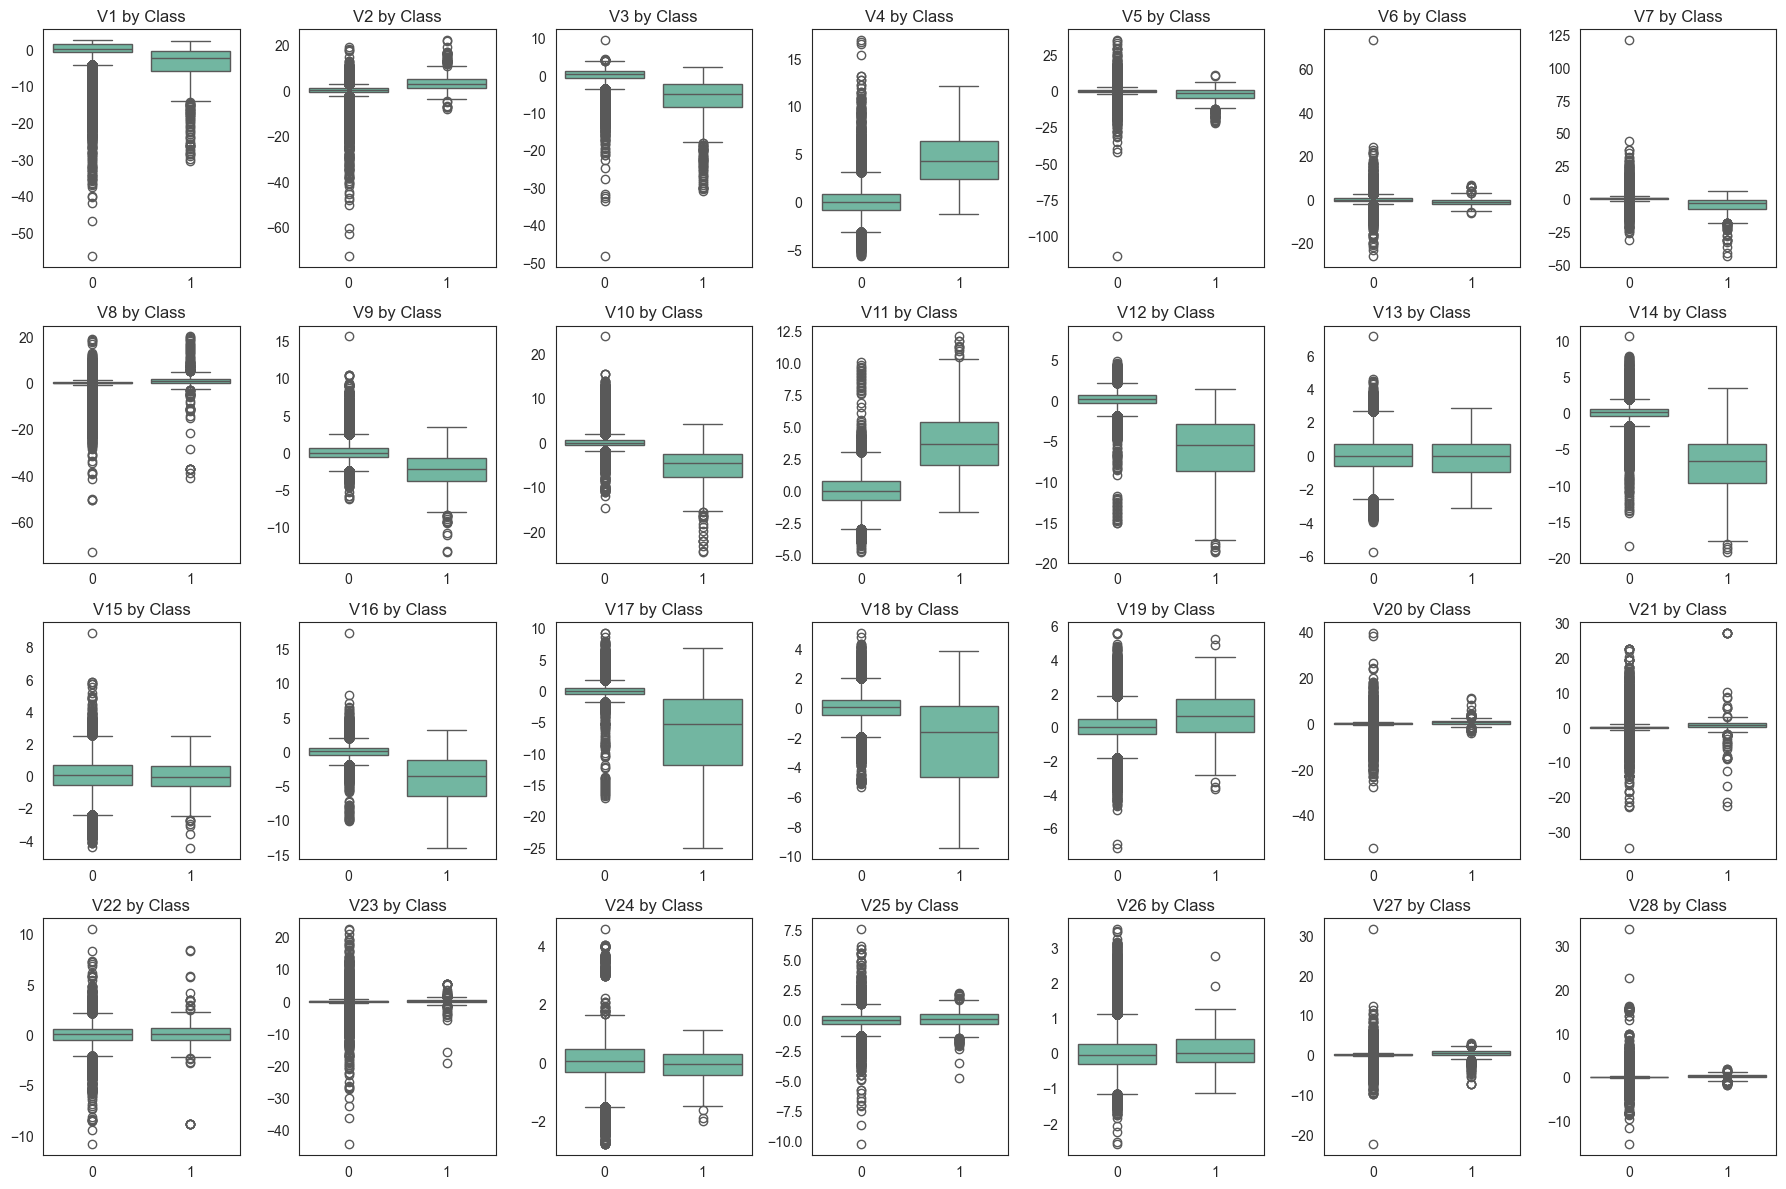

In [39]:
# 4 rows x 7 columns = 28 subplots
fig, axes = plt.subplots(nrows=4, ncols=7, figsize=(18, 12))
axes = axes.flatten()

for i, feature in enumerate(v_features):
    sns.boxplot(x='Class', y=feature, data=df, ax=axes[i])
    axes[i].set_title(f'{feature} by Class')
    axes[i].set_xlabel('')
    axes[i].set_ylabel('')

for j in range(len(v_features), len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()

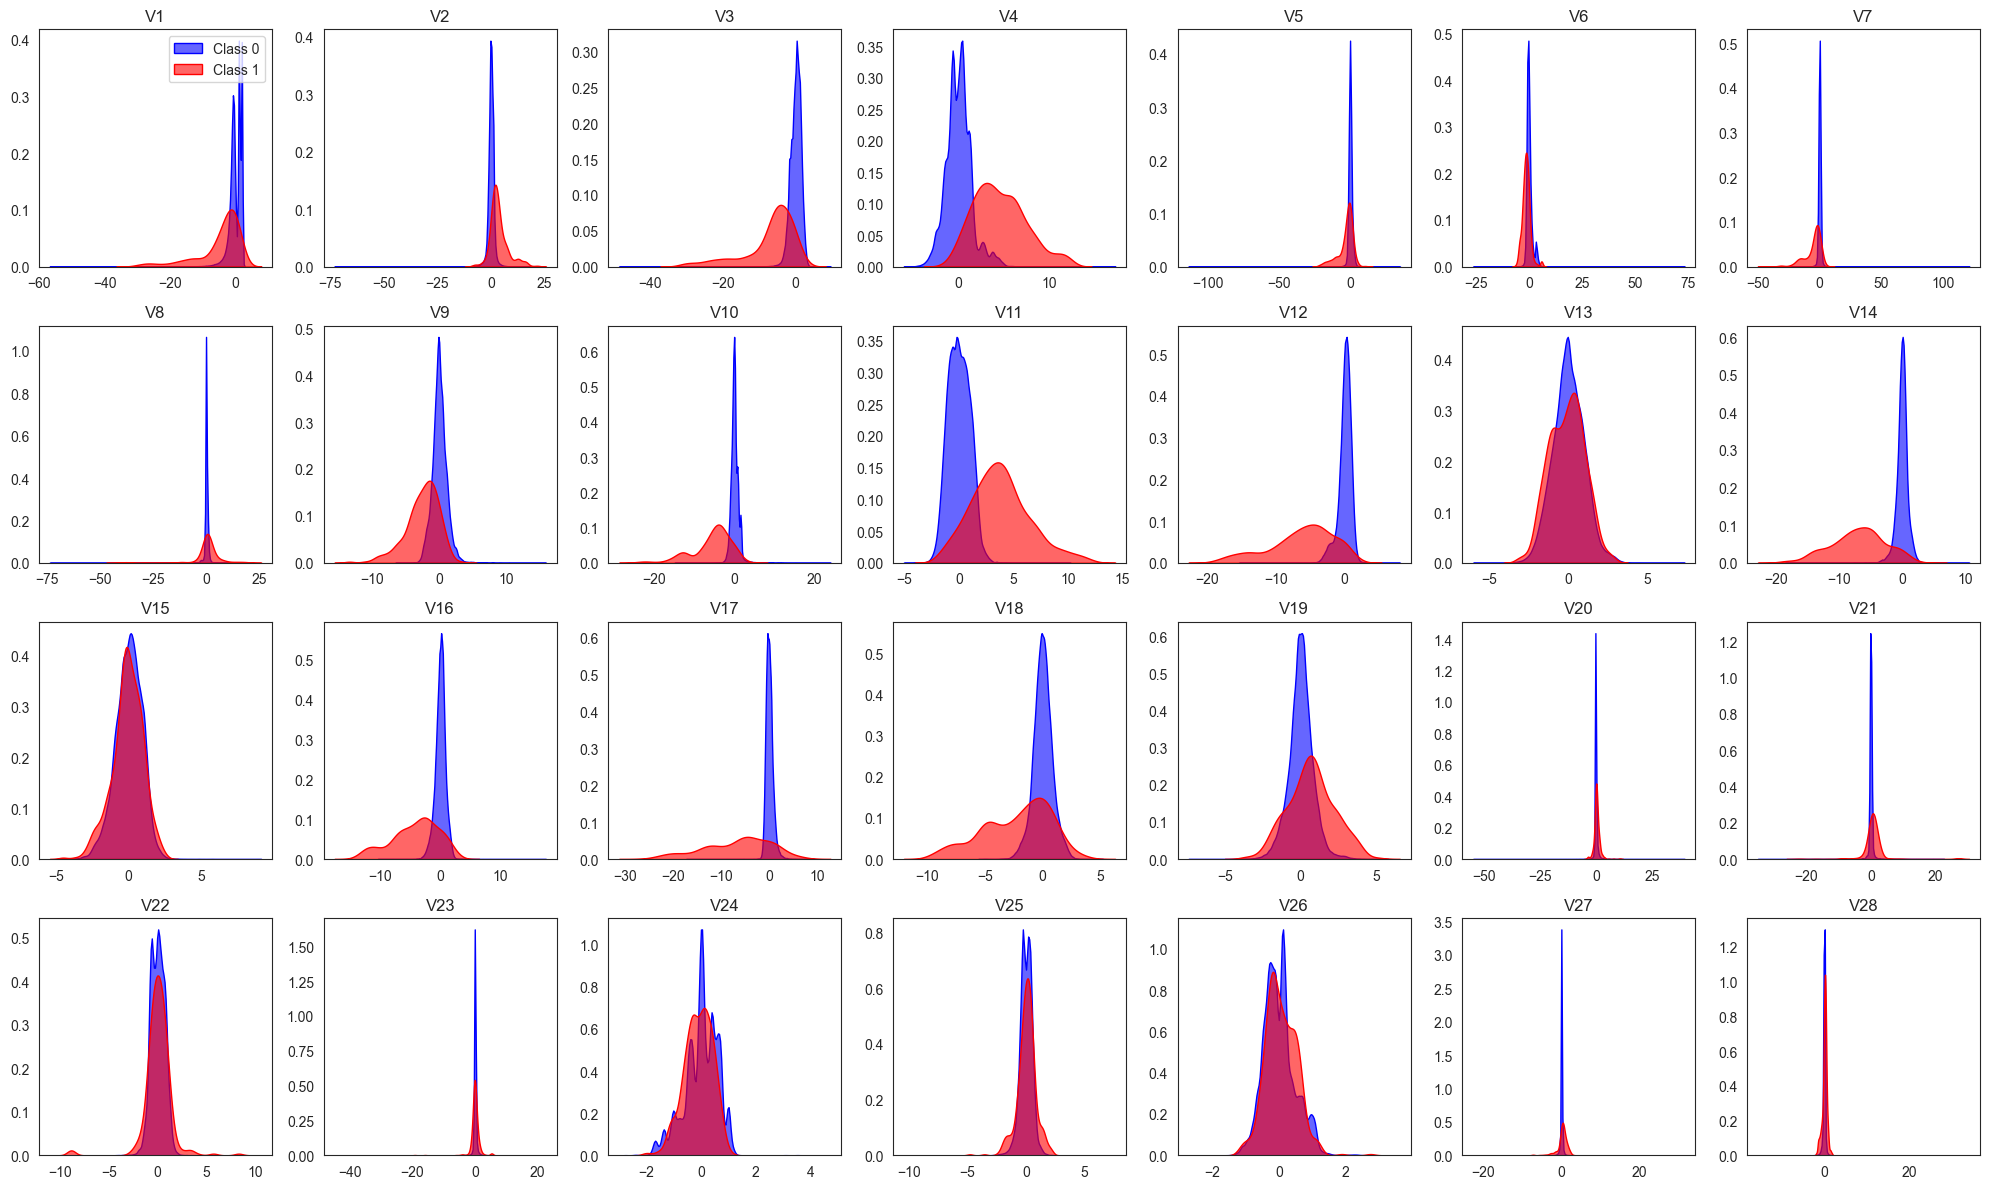

In [40]:
fig, axes = plt.subplots(nrows=4, ncols=7, figsize=(20, 12))
axes = axes.flatten()

for i, feature in enumerate(v_features):
    ax = axes[i]
    sns.kdeplot(df[df['Class'] == 0][feature], label='Class 0', fill=True, ax=ax, color='blue', alpha=0.6)
    sns.kdeplot(df[df['Class'] == 1][feature], label='Class 1', fill=True, ax=ax, color='red', alpha=0.6)
    ax.set_title(f'{feature}')
    ax.set_xlabel('')
    ax.set_ylabel('')
    ax.legend().set_visible(False)

axes[0].legend(loc='upper right')

for j in range(len(v_features), len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()

> როგორც ვხედავთ, ზოგიერთი ცვლადი და განსაკუთრებით საწყისი ცვლადები(PCA-ის პრინციპიდან გამომდინარე), გვაძლევენ ინფორმაციას კლასების შესახებ.

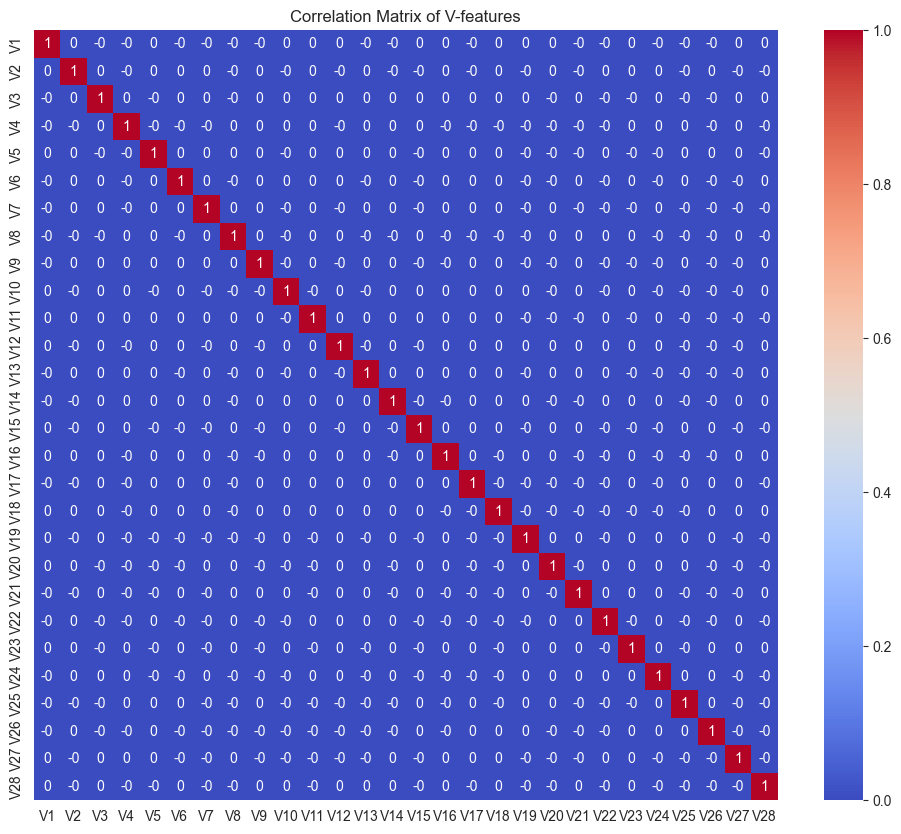

In [42]:
plt.figure(figsize=(12, 10))
sns.heatmap(df[v_features].corr().round(1), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of V-features')
plt.show()

> ბუნებრივია, რომ V ცვლადები ერთმანეთთან არ არიან კოლერირებულნი

In [44]:
correlation_with_class = df[v_features  + ['Class']].corr()['Class'].sort_values(ascending=False)
correlation_with_class

Class    1.000000
V11      0.154876
V4       0.133447
V2       0.091289
V21      0.040413
V19      0.034783
V20      0.020090
V8       0.019875
V27      0.017580
V28      0.009536
V26      0.004455
V25      0.003308
V22      0.000805
V23     -0.002685
V15     -0.004223
V13     -0.004570
V24     -0.007221
V6      -0.043643
V5      -0.094974
V9      -0.097733
V1      -0.101347
V18     -0.111485
V7      -0.187257
V3      -0.192961
V16     -0.196539
V10     -0.216883
V12     -0.260593
V14     -0.302544
V17     -0.326481
Name: Class, dtype: float64

> კლასთან კორელაციიდანაც ჩანს ზოგიერთი ცვლადის მნიშვნელობა. მოდელისთვის შესაძლოა დაგვჭირდეს სხვადასხვა ზღვრის ცდა ცვლადების გამოსაყენებლად

In [46]:
df.head(3)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V25,V26,V27,V28,Amount,Class,HourOfDay,Hour_Sin,Hour_Cos,LogAmount
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,0.128539,-0.189115,0.133558,-0.021053,149.62,0,0,0.0,1.0,5.014760
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,0.167170,0.125895,-0.008983,0.014724,2.69,0,0,0.0,1.0,1.305626
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0,0,0.0,1.0,5.939276


In [47]:
df_final = df.drop(['Time', 'HourOfDay', 'Amount'], axis=1)

# Gaussian Mixture Model

In [49]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 32 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   V1         284807 non-null  float64
 1   V2         284807 non-null  float64
 2   V3         284807 non-null  float64
 3   V4         284807 non-null  float64
 4   V5         284807 non-null  float64
 5   V6         284807 non-null  float64
 6   V7         284807 non-null  float64
 7   V8         284807 non-null  float64
 8   V9         284807 non-null  float64
 9   V10        284807 non-null  float64
 10  V11        284807 non-null  float64
 11  V12        284807 non-null  float64
 12  V13        284807 non-null  float64
 13  V14        284807 non-null  float64
 14  V15        284807 non-null  float64
 15  V16        284807 non-null  float64
 16  V17        284807 non-null  float64
 17  V18        284807 non-null  float64
 18  V19        284807 non-null  float64
 19  V20        284807 non-n

In [50]:
# Dropping features with abs(correlation) < threshold

correlation_threshold = 0.1
features_to_drop = correlation_with_class[abs(correlation_with_class) < correlation_threshold].index.tolist()

if 'Class' in features_to_drop:
    features_to_drop.remove('Class')

print(f"\nFeatures to drop (abs(corr) < {correlation_threshold}): {features_to_drop}")

current_features = [col for col in df_final.columns if col != 'Class']
selected_features = [feat for feat in current_features if feat not in features_to_drop]

print(f"\nFeatures to keep (abs(corr) > {correlation_threshold}): {selected_features}")


Features to drop (abs(corr) < 0.1): ['V2', 'V21', 'V19', 'V20', 'V8', 'V27', 'V28', 'V26', 'V25', 'V22', 'V23', 'V15', 'V13', 'V24', 'V6', 'V5', 'V9']

Features to keep (abs(corr) > 0.1): ['V1', 'V3', 'V4', 'V7', 'V10', 'V11', 'V12', 'V14', 'V16', 'V17', 'V18', 'Hour_Sin', 'Hour_Cos', 'LogAmount']


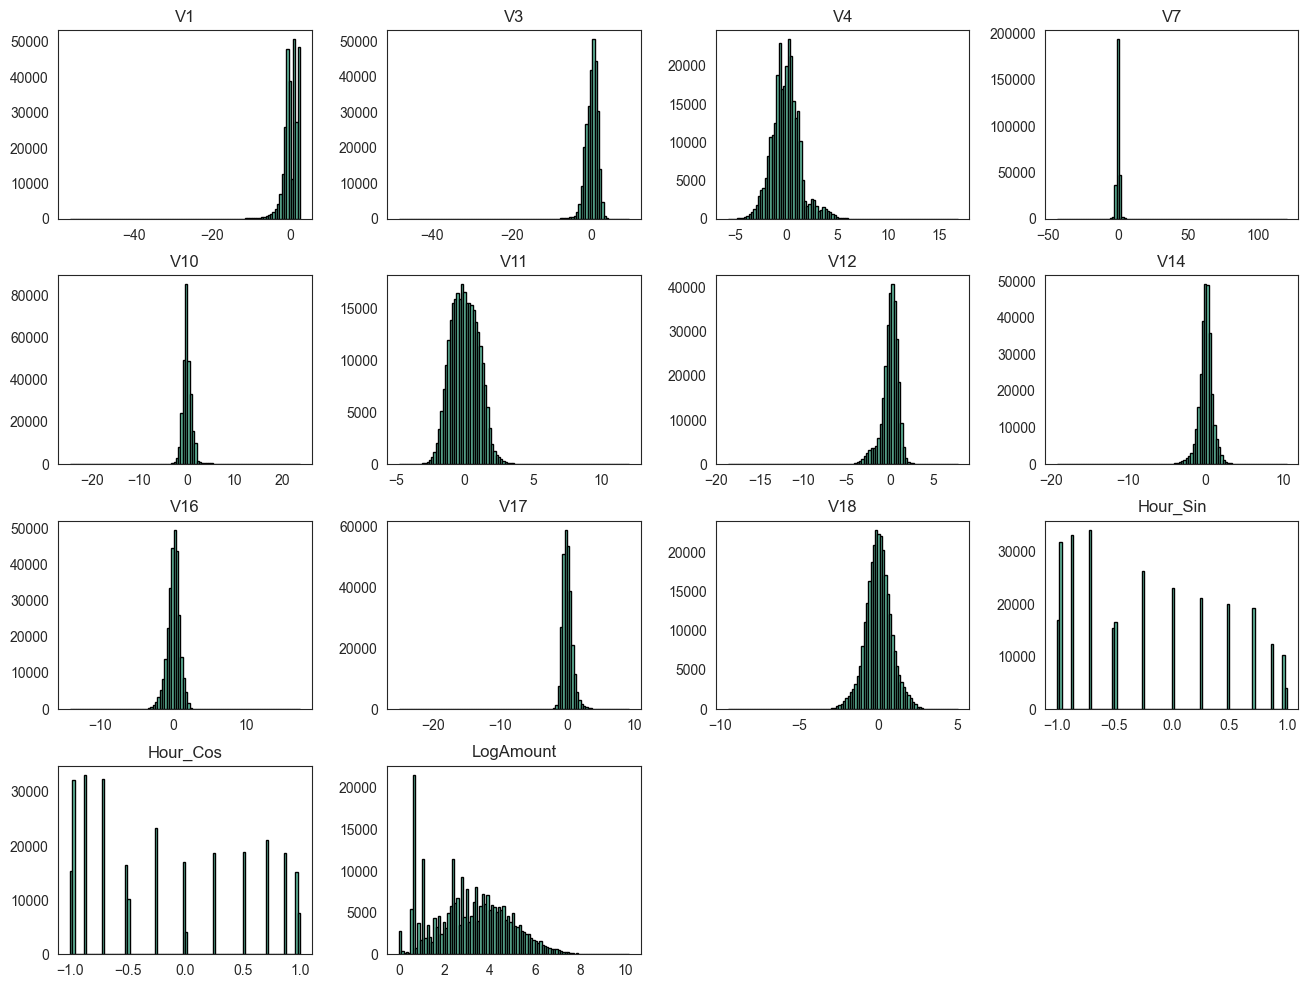

In [51]:
df_final[selected_features].hist(figsize=(16,12), bins=100, edgecolor="black", grid=False)
plt.show()

> შერჩეული ფიჩერებიდან გადახრილ მონაცემებს და Spiky მონაცემებს ტრანსფორმაციას გავუკეთებთ, რადგან გაუსიანური მოდელი ნორმალურად განაწილებულ მონაცემებს მოელის

In [53]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, PowerTransformer
from sklearn.mixture import GaussianMixture
from sklearn.metrics import f1_score, classification_report, confusion_matrix

X = df_final[selected_features]
y = df_final['Class']

# Data Scaling and Splitting

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled, columns=selected_features)

# Strain/validation/test sets (60/20/20)
X_train_val, X_test, y_train_val, y_test = train_test_split(X_scaled, y, test_size=0.20, random_state=42, stratify=y)

X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.25, random_state=42, stratify=y_train_val)

In [54]:
from sklearn.preprocessing import QuantileTransformer

cols_to_transform = ['V1', 'V3', 'V7', 'V10', 'V17', 'LogAmount']
cols_to_keep = [col for col in selected_features if col not in cols_to_transform]

quantile_transformer = QuantileTransformer(output_distribution='normal', n_quantiles=2000, random_state=42)

X_train_normal_untransformed = X_train[y_train == 0]
quantile_transformer.fit(X_train_normal_untransformed[cols_to_transform])

def apply_transformation(df, transformer, cols_to_transform, cols_to_keep):
    transformed_cols_data = transformer.transform(df[cols_to_transform])
    df_transformed = pd.DataFrame(transformed_cols_data, index=df.index, columns=cols_to_transform)
    df_final = pd.concat([df[cols_to_keep], df_transformed], axis=1)
    return df_final[selected_features]

# Applying the transformation to our train, validation, and test sets
X_train_proc = apply_transformation(X_train, quantile_transformer, cols_to_transform, cols_to_keep)
X_val_proc = apply_transformation(X_val, quantile_transformer, cols_to_transform, cols_to_keep)
X_test_proc = apply_transformation(X_test, quantile_transformer, cols_to_transform, cols_to_keep)

In [55]:
X_train_normal = X_train_proc[y_train == 0]

n_components = 3
gmm = GaussianMixture(n_components=n_components, covariance_type='full', random_state=42)

print(f"Training GMM with {n_components} components on transformed data...")
gmm.fit(X_train_normal)
print("GMM trained successfully.\n")

# Threshold Tuning with GMM Scores
print("GMM Threshold Tuning")

logp_val = gmm.score_samples(X_val_proc) # Gets log-likelihood scores for the PROCESSED validation set

best_log_epsilon = 0
best_f1 = 0

# Finding best threshold
epsilons = np.linspace(logp_val.min(), logp_val.max(), num=200)
for log_epsilon in epsilons:
    y_pred = (logp_val < log_epsilon).astype(int)
    current_f1 = f1_score(y_val, y_pred)
    if current_f1 > best_f1:
        best_f1 = current_f1
        best_log_epsilon = log_epsilon

print(f"Best Log-Epsilon found: {best_log_epsilon:.4f}")
print(f"Best F1-score on Validation Set: {best_f1:.4f}\n")

Training GMM with 3 components on transformed data...
GMM trained successfully.

GMM Threshold Tuning
Best Log-Epsilon found: -112.0183
Best F1-score on Validation Set: 0.7821



### Final GMM Evaluation on Test Set ###


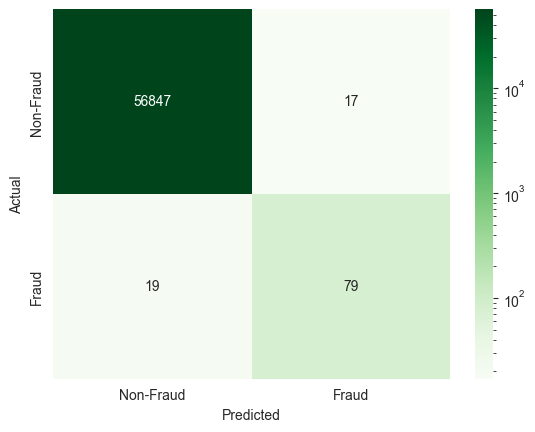


Classification Report on Test Set (GMM with Transformed Data):
               precision    recall  f1-score   support

Non-Fraud (0)       1.00      1.00      1.00     56864
    Fraud (1)       0.82      0.81      0.81        98

     accuracy                           1.00     56962
    macro avg       0.91      0.90      0.91     56962
 weighted avg       1.00      1.00      1.00     56962



In [56]:
from matplotlib.colors import LogNorm

# --- Final GMM Evaluation on Test Set ---
print("### Final GMM Evaluation on Test Set ###")

logp_test = gmm.score_samples(X_test_proc)
y_test_pred = (logp_test < best_log_epsilon).astype(int)

cm = confusion_matrix(y_test, y_test_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens', xticklabels=['Non-Fraud', 'Fraud'], yticklabels=['Non-Fraud', 'Fraud'], norm=LogNorm())
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

print("\nClassification Report on Test Set (GMM with Transformed Data):")
print(classification_report(y_test, y_test_pred, target_names=['Non-Fraud (0)', 'Fraud (1)']))

> GMM-ის სხვადასხვა ვერსიის ტესტირების შედეგად ეს არის ამ ეტაპზე ყველაზე კარგი და  საკმაოდ ნორმალური შედეგი, უკიდურესად დაუბალანსებელი მონაცემების პირობებში. შემდეგი მოდელი რომელსაც ვცდით იქნება XGBoost.

# XGBoost

In [59]:
# Dropping features with abs(correlation) < threshold

correlation_threshold = 0.1
features_to_drop = correlation_with_class[abs(correlation_with_class) < correlation_threshold].index.tolist()

if 'Class' in features_to_drop:
    features_to_drop.remove('Class')

print(f"\nFeatures to drop (abs(corr) < {correlation_threshold}): {features_to_drop}")

current_features = [col for col in df_final.columns if col != 'Class']
selected_features = [feat for feat in current_features if feat not in features_to_drop]

print(f"\nFeatures to keep (abs(corr) > {correlation_threshold}): {selected_features}")


Features to drop (abs(corr) < 0.1): ['V2', 'V21', 'V19', 'V20', 'V8', 'V27', 'V28', 'V26', 'V25', 'V22', 'V23', 'V15', 'V13', 'V24', 'V6', 'V5', 'V9']

Features to keep (abs(corr) > 0.1): ['V1', 'V3', 'V4', 'V7', 'V10', 'V11', 'V12', 'V14', 'V16', 'V17', 'V18', 'Hour_Sin', 'Hour_Cos', 'LogAmount']


In [60]:
X = df_final[selected_features]
y = df_final['Class']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled, columns=selected_features)

X_train_val, X_test, y_train_val, y_test = train_test_split(X_scaled, y, test_size=0.20, random_state=42, stratify=y)

X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.25, random_state=42, stratify=y_train_val)

Using scale_pos_weight: 577.29
Model training complete.

### Final Evaluation on Test Set ###


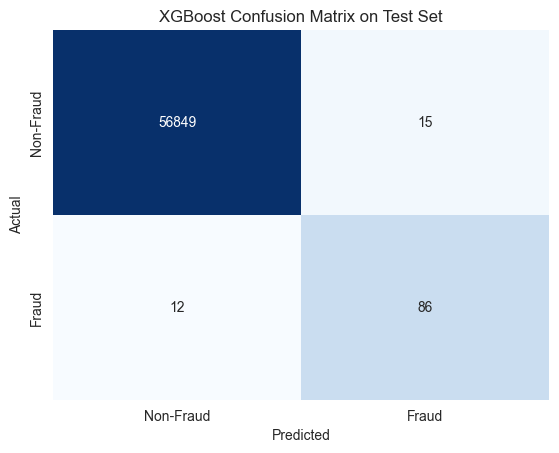


Classification Report on Test Set:
               precision    recall  f1-score   support

Non-Fraud (0)       1.00      1.00      1.00     56864
    Fraud (1)       0.85      0.88      0.86        98

     accuracy                           1.00     56962
    macro avg       0.93      0.94      0.93     56962
 weighted avg       1.00      1.00      1.00     56962

AUC-ROC Score: 0.9731
Average Precision-Recall Score (AUC-PR): 0.8778


In [61]:
import xgboost as xgb
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, average_precision_score

scale_pos_weight = y_train_val.value_counts()[0] / y_train_val.value_counts()[1]
print(f"Using scale_pos_weight: {scale_pos_weight:.2f}")

# the chosen hyperparameters ---
best_params = {'n_estimators': 100, 'min_child_weight': 2, 'max_depth': 8, 'learning_rate': 0.15, 'gamma': 0.1, 'colsample_bytree': 0.6,
               'eval_metric': 'aucpr', 'scale_pos_weight': scale_pos_weight, 'random_state': 42
}


final_model = xgb.XGBClassifier(**best_params)
final_model.fit(X_train_val, y_train_val)

print("Model training complete.")

# Final Evaluation on the Test Set
print("\n### Final Evaluation on Test Set ###")

y_test_pred = final_model.predict(X_test)
y_test_proba = final_model.predict_proba(X_test)[:, 1]

# the confusion matrix
cm = confusion_matrix(y_test, y_test_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Non-Fraud', 'Fraud'], yticklabels=['Non-Fraud', 'Fraud'], norm=LogNorm(), cbar=False)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('XGBoost Confusion Matrix on Test Set')
plt.show()

# final classification report and scores
print("\nClassification Report on Test Set:")
print(classification_report(y_test, y_test_pred, target_names=['Non-Fraud (0)', 'Fraud (1)']))
print(f"AUC-ROC Score: {roc_auc_score(y_test, y_test_proba):.4f}")
print(f"Average Precision-Recall Score (AUC-PR): {average_precision_score(y_test, y_test_proba):.4f}")

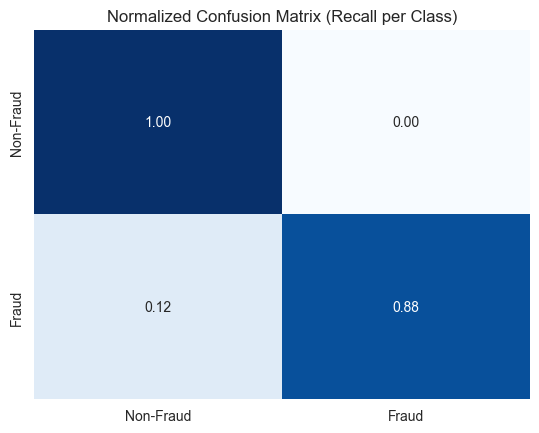

In [62]:
cm = confusion_matrix(y_test, y_test_pred, normalize='true')
sns.heatmap(cm, annot=True, fmt='.2f', cmap='Blues', cbar=False,
            xticklabels=['Non-Fraud', 'Fraud'],
            yticklabels=['Non-Fraud', 'Fraud'])
plt.title('Normalized Confusion Matrix (Recall per Class)')
plt.show()

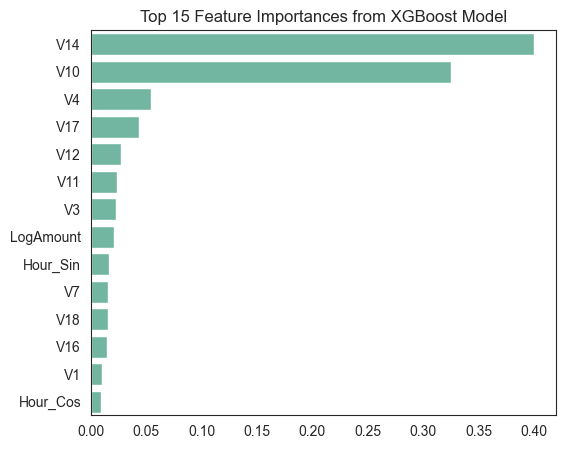

In [63]:
# Create a DataFrame of feature importances
feature_importances = pd.DataFrame({
    'feature': X_train.columns,
    'importance': final_model.feature_importances_
}).sort_values('importance', ascending=False)

# Plot the feature importances
plt.figure(figsize=(6, 5))
sns.barplot(x='importance', y='feature', data=feature_importances.head(100))
plt.title('Top 15 Feature Importances from XGBoost Model')
plt.xlabel('')
plt.ylabel('')
plt.show()

> როგორც ვხედავთ, XGBoost-ს საკმაოდ კარგი შედეგი აქვს. ვცადოთ Random Forest-იც.

> P.S. სიმარტივისთვის, აქ გამოტოვებულია ვალიდაციის ეტაპი, რადგან პარამეტრები უკვე შერჩეულია გრიდ სერჩისა და კროსვალიდაციის მეშვეობით.

In [ ]:
from sklearn.ensemble import RandomForestClassifier


final_model = RandomForestClassifier(n_estimators=300, class_weight='balanced', max_depth=7, random_state=42, n_jobs=-1)

final_model.fit(X_train_val, y_train_val)

# Final Evaluation on the Test Set
print("\n### Final Evaluation on Test Set ###")

y_test_pred = final_model.predict(X_test)
y_test_proba = final_model.predict_proba(X_test)[:, 1]

cm = confusion_matrix(y_test, y_test_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Non-Fraud', 'Fraud'],
            yticklabels=['Non-Fraud', 'Fraud'],
            norm=LogNorm(),
            cbar=False)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Random Forest Confusion Matrix on Test Set')
plt.show()

# Classification Report and Scores
print("\nClassification Report on Test Set:")
print(classification_report(y_test, y_test_pred, target_names=['Non-Fraud (0)', 'Fraud (1)']))
print(f"AUC-ROC Score: {roc_auc_score(y_test, y_test_proba):.4f}")
print(f"Average Precision-Recall Score (AUC-PR): {average_precision_score(y_test, y_test_proba):.4f}")

> მოდელის მცდელობის პირობებში ეს 0.89 არის ყველაზე მაღალი რექოლი, რაც გვქონია. არის მისკლასიფიკაციის შემთხვევებიც. რეალურ სამუშაო გარემოში შესაძლებელია მოდელების დამატებით გაუმჯობესება და საბოლოო მოდელის ბიზნეს ამოცანის მიხედვით შერჩევა.